# Сверточные сети

## Влияние числа параметров сети на ее точность

Однослойный перцептрон может обрабатывать только линейно разделимые классы. Многослойный перцептрон может проводить любые непрерывные границы между классами.

Чтобы однослойный перцептрон функционировал корректно, два класса $C_1$ и $C_2$ должны быть линейно разделимыми.

Линейно-разделимые классы| Линейно-неразделимые классы
-------------------------------|------------------
<img src="img/lin_razd.png" height="10%">|<img src="img/lin_ne_razd.png" height="10%">


### Теорема Ковера о разделимости образов

**Нелинейное преобразование задачи классификации образов в пространство
более высокой размерности повышает вероятность линейной разделимости образов.**

Применение к многослойному перцептрону (с одним скрытым слоем):

1. На вход в перцептрон поступает вектор признаков, размерность которого совпадает с размерностью исходной задачи.
2. Скрытый слой производит нелинейное отображение исходного вектора в новое пространство. Размерность нового пространства равна числу нейронов скрытого слоя.
3. Выходной слой принимает на вход вектор признаков от скрытого слоя и производит классификацию.

Точность классификатора (для двух классов) зависит от размера обучающей выборки следующим образом:
<img src="img/Hughes2.png" height="30%">
Hughes G. On the mean accuracy of statistical pattern recognizers //IEEE transactions on information theory. – 1968

**Почему при конечной выборке сначала точность классификаторов увеличивается, а затем после некоторого предела падает?**

Две противоположные тенденции:

* с увеличением размерности разделимость классов также увеличивается (может увеличиться);
* чем больше размерность, тем больше параметров классификатора нужно оценить.



Светочная сеть - специальная архитектура искусственных нейронных сетей нацеленная на эффективное распознавание образов. 

Светочные сети хорошо работают там, где "буксуют" полносвязные сети. Это, в первую очередь, обработка аудиоданных и изображений. Эти данные отличаются:
 * ~~избыточностью~~ ~~многовловностью~~ большим объемом схожей информации; например, изображение размером $100\times 100 = 10~000$ пикселей. Если подавать его на вход нейросети так, как оно есть, получаем 10 тыс. входов, при этом соседние пиксели будут очень похожи по характеристикам.
 * описываемые объекты/явления характеризуются вариативностью в масштабе, деформациях и прочих искажениях и преобразованиях. 

## Фильтрация изображений в скользящем окне

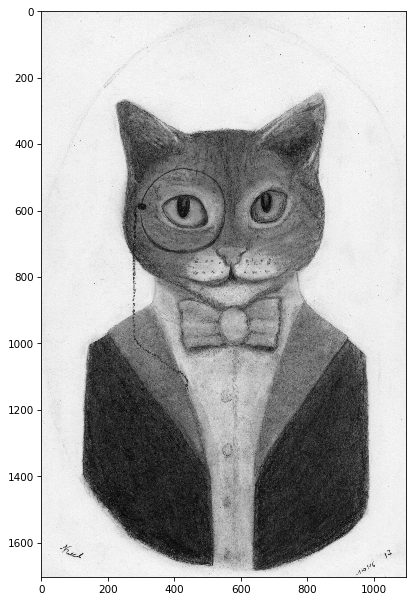

In [1]:
%matplotlib inline

from PIL import Image
from scipy import ndimage
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

im = Image.open("img/test.png")
img_array = np.asarray(im)[:, :, 0]/ 255.0

plt.figure(figsize=(20,10), dpi=75)
imshow(img_array,  cmap='gray')

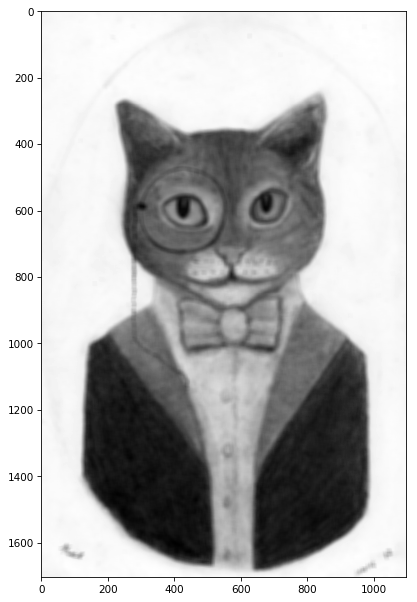

In [2]:
# Сгладим (размоем) изображение

ker = (1/(9*9.0))*np.ones((15, 15))

# Convolve
smooth = ndimage.convolve(img_array, ker)

plt.figure(figsize=(20,10), dpi=75)
imshow(smooth, cmap='gray')


In [3]:
diff = img_array - smooth
res = img_array + 2*diff

res = np.maximum(res, np.zeros(res.shape))
res = np.minimum(res, np.ones(res.shape))

# plt.figure(figsize=(20,10), dpi=75)
# imshow(res, cmap='gray'

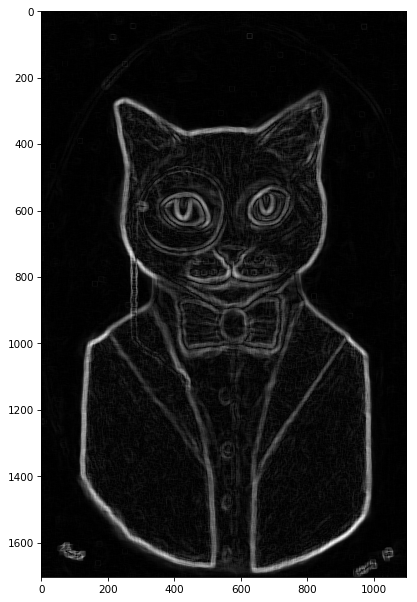

In [4]:
# Подчеркнем границы на изображении

k1 = np.array([[-1, -2, -1],
              [0, 0, 0],
              [1, 2, 1]])

k2 = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

g1 = ndimage.convolve(smooth, k1)
g2 = ndimage.convolve(smooth, k2)

g = np.abs(g1) + np.abs(g2)

plt.figure(figsize=(20,10), dpi=75)
imshow(g, cmap='gray')


## Принципы работы сверточных сетей

* Сверточная сеть -- мноroслойный персептрон, специфического вида созданный для распознавания одно-/дву-/трех/...-мерных поверхностей с высокой степенью инвариантности к преобразованиям и деформациям. 

* Слои имеют четко выраженные назначения.

* Обучение осуществляется с учителем.

[<img src="img/CNNtopo.png" height="30%">](https://commons.wikimedia.org/wiki/File:Typical_cnn.png#/media/File:Typical_cnn.png)

LeCun Y., Y. Bengio. "Convolutional networks for images, speech and time series", 1995.


### Архитектура сети

* Извлечение признаков. Каждый нейрон получает входной сиrнал от локальноrо рецептивого поля в предыдущем слое, извлекая таким образом еro локальные признаки. Как только признак извлечен, ero точное местоположение не имеет значения, поскольку приблизительно установлено ero расположение относительно других признаков.
[<img src="img/CNNtopo.png" height="30%">](https://commons.wikimedia.org/wiki/File:Typical_cnn.png#/media/File:Typical_cnn.png)

* Отображение признаков. Каждый вычислительный слой сети состоит из множества карт признаков, на котором все нейроны должны совместно использовать одно и то же множество синаптических весов. Это обеспечивает:
 1. Инвариантность к смещению, реализованную посредством свертки с ядром небольшого размера.
 2. Сокращение числа свободных параметров.
[<img src="img/CNNtopo.png" height="30%">](https://commons.wikimedia.org/wiki/File:Typical_cnn.png#/media/File:Typical_cnn.png)

* Подвыборка. За каждым слоем свертки следует вычислительный слой, осуществляющий локальное усреднение и подвыборку. Посредством этоro достиrается уменьшение разрешения для карт признакав. Эта операция приводит к уменьшению чувствительности выходноrо сиrнала оператора отображения признакав, к смещению и прочим формам деформации.
[<img src="img/CNNtopo.png" height="30%">](https://commons.wikimedia.org/wiki/File:Typical_cnn.png#/media/File:Typical_cnn.png)

(Пример распознавания рукописных символов)

[<img src="img/CNNtopo.png" height="30%">](https://commons.wikimedia.org/wiki/File:Typical_cnn.png#/media/File:Typical_cnn.png)

Схема работы сверточной сети такова:

0. На вход подаются изображения 28x28 пикселей - изображения символов.
1. Первый скрытый слой: выполняет свертку. Состоит из 4-х карт признаков (4 разных фильтра по 5x5 нейронов). Каждая карта - матрица из 24x24 нейронов.
2. Второй скрытый слой: подвыборка и локальное усреднние. Каждый слой - 4 матрицы по 12x12 нейронов.
3. Третий скрытый слой: повторная свертка. Состоит из 12 карт признаков 8x8 нейронов.
4. Четвертый скрытый слой: вторая подвыборка и усреднение.
5. Полносвязная нейронная сеть.

Многослойный перцептрон подобной архитектуры содержал бы ~100000 различных весов. Данная сверточная сеть содержит 2600 свободных параметров.

Часто используются следующие следующие схемы:

1. Последовательность сверток:
 CONN -> ReLU -> CONN -> ReLU -> ... -> CONN -> ReLU -> MLP
 
2. Свертки и подвыборки:
 CONN -> ReLU -> Pool->  CONN -> ReLU -> Pool -> ... -> MLP

#### Некоторые подробности

1. На результат свертки влияет шаг (stride), на который сдвигается рецептивное поле нейронов (~ скользящее окно). Может быть 1, 2, ... . Часто $stride=\frac{F-1}2$, $F$ -- размер ядра свертки.
2. Заполнение краев:
 - нет заполнения;
 - нули;
 - копии;
 - зеркально.
3. "Толщина" выхода сверточнго слоя - число фильтров. Например:
  3x32x32 -> N сверток 3x3 -> Nx30x30
5. Число параметров сверточного слоя. Например, 10 фильтров 5x5 на RGB изображении: 760 весов (760 = (5 x 5) x 3 + 10).

Итог по сверточному слою (для изображений):
1. Принимает на вход "объемы" W1xH1xD1.
2. Имеет 4 гиперпараметра:
 * число фильтров;
 * размер ядра F;
 * шаг Stride;
 * параметр заполнения.
3. Возвращает "объемы" W2xH2xD2.
4. Веса нейронов одинаковы внутри каждого фильра (разделяемые параметры).

Слой подвыборки (обычно это MaxPool, но возможны и "настоящие" нейроны):
1. Имеет 3 гиперпараметра:
 * размер (2x2);
 * шаг (2);
 * операция
2. Принимает на вход "объемы" W1xH1xD1.
3. Выдает "объемы" W2xH2xD2 (D2=D1).

Преимущества сверточных сетей перед классическим многослойным перцептроном (в задаче анализа изображений):
 * значительное сокращение числа параметров => повышение способности к обобщению;
 * слабая взаимная зависимость фильтров => параллельность обработки;
 * автоматическое выделение признаков;
 * устойчивость к искажениям входных данных.